In [1]:
import pandas as pd
import spotipy
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
client_id = "d635b319966c46e2bc462d0050e1ab57"
client_secret = "c9e9c62499744c9195eed1fa885bf15e"
fname = "track_details.csv"

def get_spotify_object(client_id,client_secret):
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    return spotipy.Spotify(client_credentials_manager=client_credentials_manager)



In [3]:
sp = get_spotify_object(client_id,client_secret)

In [7]:
def get_playlist_uri(playlist_name,user):
    playlists = sp.user_playlists(user)
    while playlists:
        for i,playlist in enumerate(playlists['items']):
            if playlist["name"].strip() == playlist_name:
                return playlist['uri']
        if playlists['next']:
            playlists = sp.next(playlists)
        else:
            playlists = None
    return ""


def get_tracks(playlist):
    tracks = playlist['tracks']
    count = 0 
    song_ids = []
    while tracks:
        song_ids += [item['track']['id'] for item in tracks['items']]
        count += len(tracks['items'])
        if tracks['next']:
            tracks = sp.next(tracks)
        else:
            tracks = None
    return song_ids


In [8]:
user= '12130571071'
playlist_uri = get_playlist_uri("Misc Tamil",user)
results = sp.playlist(playlist_uri)
tracks = get_tracks(results)


In [127]:
def get_artist_name(artists):
    return ", ".join([artist['name'] for artist in artists])
def get_song_info(song):
    info = {}
    info['artists'] = get_artist_name(song['artists'])
    info['duration_ms'] = song['duration_ms']
    info['name'] = song['name']
    info['popularity'] = song['popularity']
    info['music_composer'] = get_artist_name(song['album']['artists'])
    info['release_date'] = song['album']['release_date']
    info['id'] = song['id']
    info['album_name'] = song['album']['name']
    info['popularity'] = song['popularity']
    return info


info = []
audio_features = []
for i in song_ids:
    song = sp.track(i)
    audio_feature = sp.audio_features(i)[0]
    audio_features.append(audio_feature)
    info.append(get_song_info(song))

In [128]:
info_df = pd.DataFrame(info)
info_df.set_index('id',inplace=True)
audio_df = pd.DataFrame(audio_features)
audio_df.set_index('id',inplace=True)

In [129]:
final_df = pd.concat([info_df,audio_df],join="inner",axis=1)
final_df.reset_index(inplace=True)

In [135]:
# final_df.to_csv(fname,index=False)

In [10]:
df = pd.read_csv(fname)

In [30]:
# df['duration_ms'].plot.area()
df['release_date'] = pd.to_datetime(df['release_date'])

Text(0.5, 0, 'Year')

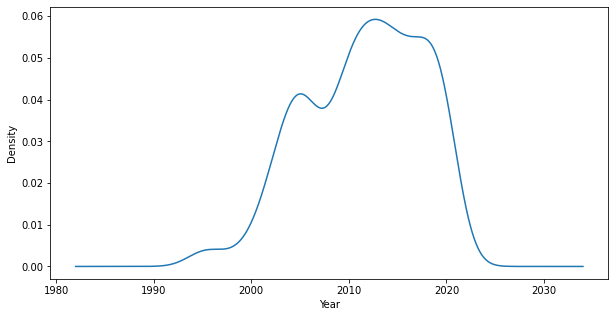

In [42]:
ax = df['release_date'].dt.year.plot.kde(figsize=(10,5))
ax.set_xlabel("Year")

Text(0.5, 0, 'Music Director')

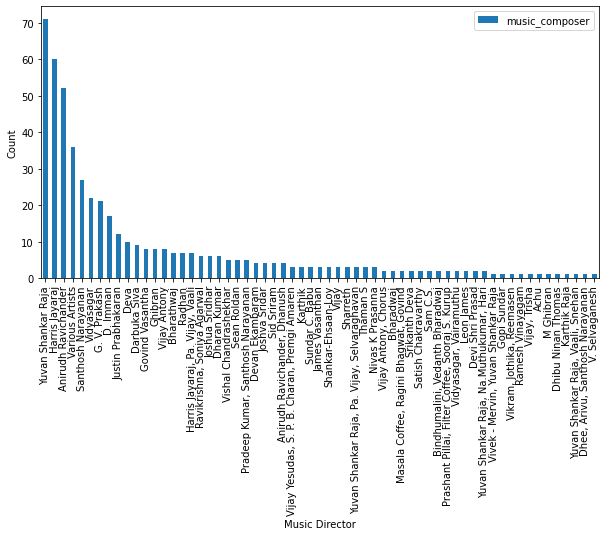

In [65]:
ax = pd.DataFrame(df['music_composer'].value_counts()).plot.bar(figsize=(10,5))
ax.set_ylabel("Count")
ax.set_xlabel("Music Director")

In [78]:
s = df['artists'].str.split(',')
# df.join(s)

In [79]:
df.stack()

0                  [V. Selvaganesh,  Karthik,  Chinmayi]
1                    [Anirudh Ravichander,  Ajesh Ashok]
2        [Anirudh Ravichander,  Dhanush,  Shruti Haasan]
3      [Anirudh Ravichander,  Vijay Yesudas,  Shweta ...
4      [Anirudh Ravichander,  The Chennai Strings Orc...
                             ...                        
492                                [Anitha Chandrasekar]
493                                       [Chinna Ponnu]
494                                            [Karthik]
495                               [Karthik,  Gaana Guna]
496                  [Dhee,  Arivu,  Santhosh Narayanan]
Name: artists, Length: 497, dtype: object